In [2]:
import pandas as pd
import seaborn as sns
import acquire
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans

## Acquire/Preparing (Wrangling)

In [3]:
#what does the data look like
df = acquire.zillow_data()
df

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,id,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,17173851,NaN,NaN,261.0,NaN,None,NaN,NaN,787,NaN,...,389.0,0.088469,2017-01-03,None,None,None,None,Single Family Residential,None,None
1,10821119,NaN,NaN,261.0,2.0,None,NaN,NaN,1702,NaN,...,402.0,0.025629,2017-01-03,None,None,None,Central,Single Family Residential,None,None
2,11007640,NaN,NaN,261.0,2.0,None,NaN,1.0,2412,NaN,...,2699.0,0.020360,2017-01-12,Central,None,None,Central,Single Family Residential,None,None
3,11457850,NaN,NaN,261.0,7.0,None,NaN,NaN,3770,NaN,...,2229.0,0.054233,2017-01-11,None,None,None,Floor/Wall,Single Family Residential,None,None
4,12591550,NaN,NaN,261.0,2.0,None,NaN,NaN,8197,NaN,...,3038.0,-0.016170,2017-01-13,None,None,None,Central,Single Family Residential,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52437,12885754,NaN,NaN,261.0,7.0,None,NaN,NaN,2976765,NaN,...,42657.0,0.515289,2017-06-01,None,None,None,Floor/Wall,Single Family Residential,None,None
52438,13869000,NaN,NaN,261.0,NaN,None,NaN,NaN,2977815,NaN,...,32297.0,0.009512,2017-05-02,None,None,None,None,Single Family Residential,None,None
52439,13890509,NaN,NaN,261.0,NaN,None,NaN,NaN,2977914,NaN,...,28537.0,-0.031048,2017-04-21,None,None,None,None,Single Family Residential,None,None
52440,17246810,NaN,NaN,261.0,NaN,None,NaN,NaN,2980979,NaN,...,8396.0,-0.031665,2017-02-07,None,None,None,None,Single Family Residential,None,None


In [4]:
#let's get an idea of what the logerror is and looks like
df.logerror.describe()
#the max and min are pretty close apart 
#i want just the outliers
#i do not know what the negative or positive logerror mean wether they over or underestimated the price
#better here to over estimate then underestimate
#|| absolute value

count    52441.000000
mean         0.018298
std          0.177501
min         -4.655420
25%         -0.024639
50%          0.007011
75%          0.040692
max          5.262999
Name: logerror, dtype: float64

Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

<b>Where are the upper outliers</b>

In [5]:
#this closes us in on the problem we are looking at
upper_error = df[df.logerror >= .1]
upper_error

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,id,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
5,12755884,NaN,NaN,261.0,2.0,None,NaN,1.0,8864,NaN,...,1192.0,0.442837,2017-01-06,Central,None,None,Central,Single Family Residential,None,None
12,10736968,NaN,NaN,261.0,2.0,None,NaN,1.0,16242,NaN,...,81.0,0.116061,2017-01-02,Central,None,None,Central,Single Family Residential,None,None
20,12588379,NaN,NaN,261.0,20.0,None,NaN,NaN,23020,NaN,...,3420.0,0.106150,2017-01-17,None,None,None,Solar,Single Family Residential,None,None
28,11920295,NaN,NaN,261.0,2.0,None,NaN,1.0,28801,NaN,...,1857.0,0.233307,2017-01-10,Central,None,None,Central,Single Family Residential,None,None
34,11010220,NaN,NaN,261.0,2.0,None,NaN,1.0,32246,NaN,...,3691.0,0.180782,2017-01-18,Central,None,None,Central,Single Family Residential,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,12469375,NaN,NaN,261.0,7.0,None,NaN,NaN,2915236,NaN,...,11875.0,0.137449,2017-02-23,None,None,None,Floor/Wall,Single Family Residential,None,None
52421,11970685,NaN,NaN,261.0,2.0,None,NaN,NaN,2928233,NaN,...,45724.0,0.221642,2017-06-13,None,None,None,Central,Single Family Residential,None,None
52432,14445371,NaN,NaN,261.0,NaN,None,NaN,NaN,2965254,NaN,...,63175.0,0.594828,2017-08-01,None,None,None,None,Single Family Residential,None,None
52436,12087743,NaN,NaN,261.0,7.0,None,NaN,NaN,2973484,NaN,...,31255.0,0.175492,2017-04-28,None,None,None,Floor/Wall,Single Family Residential,None,None


In [6]:
#getting a sense of all of the columns imported
df.columns

Index(['parcelid', 'typeconstructiontypeid', 'storytypeid',
       'propertylandusetypeid', 'heatingorsystemtypeid', 'buildingclasstypeid',
       'architecturalstyletypeid', 'airconditioningtypeid', 'id',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'latitude',
       'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'threequarterbathnbr',
       'unitcnt', 'yardbuildingsqft17',

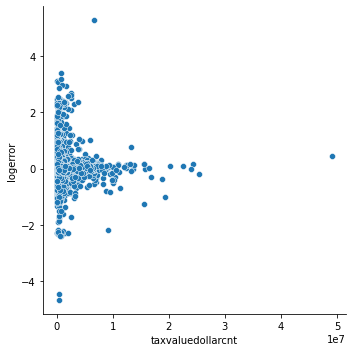

In [7]:
#let's plot out what the logerror lands around price
sns.relplot(x=df.taxvaluedollarcnt ,y=df.logerror, data=df)

<AxesSubplot:>

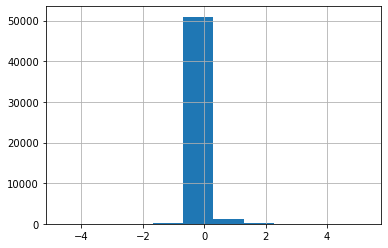

In [8]:
#what does the logerror look like on a grand scale
df.logerror.hist()

In [9]:
#can i make a relplot that shoes me where this distribution is
df.isnull().sum()

parcelid                      0
typeconstructiontypeid    52366
storytypeid               52395
propertylandusetypeid         0
heatingorsystemtypeid     18507
                          ...  
buildingclassdesc         52442
heatingorsystemdesc       18507
propertylandusedesc           0
storydesc                 52395
typeconstructiondesc      52366
Length: 69, dtype: int64

<b>About 10% of the data has upper outliers</b>

In [10]:
#checking how many values use propertylandusetypeid
df.propertylandusetypeid.value_counts()

261.0    52441
279.0        1
Name: propertylandusetypeid, dtype: int64

In [11]:
#looking for what story type even is
df.storytypeid
#in hind sight i think it means the amount of floors

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
52437   NaN
52438   NaN
52439   NaN
52440   NaN
52441   NaN
Name: storytypeid, Length: 52442, dtype: float64

In [12]:
#what i can also do with the data is 
#what does logerror really represent?
# i now have the information

> Your audience for this project is a data science team. The presentation will consist of a notebook demo of the discoveries you made and work you have done related to uncovering what the drivers of the error in the zestimate is.
<br>
<a href="https://ds.codeup.com/clustering/project/">Project Source</a>

><i>𝑙𝑜𝑔𝑒𝑟𝑟𝑜𝑟=𝑙𝑜𝑔(𝑍𝑒𝑠𝑡𝑖𝑚𝑎𝑡𝑒)−𝑙𝑜𝑔(𝑆𝑎𝑙𝑒𝑃𝑟𝑖𝑐𝑒)</i>
<br>
<a href="https://www.kaggle.com/competitions/zillow-prize-1/data">from zillow website</a>

<div>This series of observations on trying to understand logerror has led me back to the acquireing stage to narrow in what I am looking for. From here in order to head towards my MVP model I shall no longer mess with the data coming in. Rather here in I will explore and find what I will. Exploration can take a while so it is best I set up goals.</div>
> positive log error means that the price was overestimated
> negative log error means that the price was underestimated

<div>Since I am going to re-acquire my data I can now plan out where and how I am going to handle the outliers, we handle outliers because it messes with our machine learnign accuracy in a negative way.</div>

<div>So this then begs the question what is a threshold I can set to where we need to start worrying about. It would take a good bit of time to have a great reason mathematically. For now maybe I can look at where the error lies in terms of the described info of logerror. Just pick a number (|.03|), fine I will change it. I just realised that I will need both a lower and upper bound limits to control the amount of data coming through. In normal speak that is, handle outliers. The upper bound threshold will be 3 while the lower bound threshold is .03 </div>

Currently the SQL server is on the fritz so I am going to have to move on as if I have all of the data with me

In [13]:
#what columns can I drop that don't yeild much information?
#I do not have any leads just yet
df.head(3)

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,id,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,17173851,NaN,NaN,261.0,NaN,None,NaN,NaN,787,NaN,...,389.0,0.088469,2017-01-03,None,None,None,None,Single Family Residential,None,None
1,10821119,NaN,NaN,261.0,2.0,None,NaN,NaN,1702,NaN,...,402.0,0.025629,2017-01-03,None,None,None,Central,Single Family Residential,None,None
2,11007640,NaN,NaN,261.0,2.0,None,NaN,1.0,2412,NaN,...,2699.0,0.020360,2017-01-12,Central,None,None,Central,Single Family Residential,None,None


In [14]:
#wait why am i dropping my columns
# df.isna().value_counts()

In [15]:
#this lovely bit of code was handed to me by Ryan Orsinger
outlies = df[(df.logerror >= 0.03) | (df.logerror <= -0.03)]
#i am calling it outlies because i want to save the word outliers
outlies

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,id,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,17173851,NaN,NaN,261.0,NaN,None,NaN,NaN,787,NaN,...,389.0,0.088469,2017-01-03,None,None,None,None,Single Family Residential,None,None
3,11457850,NaN,NaN,261.0,7.0,None,NaN,NaN,3770,NaN,...,2229.0,0.054233,2017-01-11,None,None,None,Floor/Wall,Single Family Residential,None,None
5,12755884,NaN,NaN,261.0,2.0,None,NaN,1.0,8864,NaN,...,1192.0,0.442837,2017-01-06,Central,None,None,Central,Single Family Residential,None,None
6,13983750,NaN,NaN,261.0,NaN,None,NaN,NaN,10930,NaN,...,3247.0,0.087099,2017-01-17,None,None,None,None,Single Family Residential,None,None
8,14399561,NaN,NaN,261.0,NaN,None,NaN,NaN,12462,NaN,...,2883.0,0.032578,2017-01-13,None,None,None,None,Single Family Residential,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,12087743,NaN,NaN,261.0,7.0,None,NaN,NaN,2973484,NaN,...,31255.0,0.175492,2017-04-28,None,None,None,Floor/Wall,Single Family Residential,None,None
52437,12885754,NaN,NaN,261.0,7.0,None,NaN,NaN,2976765,NaN,...,42657.0,0.515289,2017-06-01,None,None,None,Floor/Wall,Single Family Residential,None,None
52439,13890509,NaN,NaN,261.0,NaN,None,NaN,NaN,2977914,NaN,...,28537.0,-0.031048,2017-04-21,None,None,None,None,Single Family Residential,None,None
52440,17246810,NaN,NaN,261.0,NaN,None,NaN,NaN,2980979,NaN,...,8396.0,-0.031665,2017-02-07,None,None,None,None,Single Family Residential,None,None


Sweet! even though I have cut my original data set in half I should be able  to have enough to workthrough. From here in I can split the data before further investigating

In [16]:
train, validate, test = acquire.traintestsplit(outlies)
train, validate, test

(       parcelid  typeconstructiontypeid  storytypeid  propertylandusetypeid  \
 12665  11034859                     NaN          NaN                  261.0   
 21882  12414696                     NaN          NaN                  261.0   
 26080  11922321                     NaN          NaN                  261.0   
 5143   12833180                     NaN          NaN                  261.0   
 23225  12027183                     NaN          NaN                  261.0   
 ...         ...                     ...          ...                    ...   
 31979  13009641                     NaN          NaN                  261.0   
 29061  13860688                     NaN          NaN                  261.0   
 26733  11795660                     NaN          NaN                  261.0   
 37761  11450752                     NaN          NaN                  261.0   
 10815  14025543                     NaN          NaN                  261.0   
 
        heatingorsystemtypeid building

In [17]:
train

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,id,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
12665,11034859,NaN,NaN,261.0,7.0,None,NaN,NaN,1240408,NaN,...,37656.0,0.312669,2017-05-18,None,None,None,Floor/Wall,Single Family Residential,None,None
21882,12414696,NaN,NaN,261.0,2.0,None,NaN,NaN,812926,NaN,...,75915.0,0.191992,2017-09-12,None,None,None,Central,Single Family Residential,None,None
26080,11922321,NaN,NaN,261.0,7.0,None,NaN,NaN,94865,NaN,...,49392.0,0.073156,2017-06-22,None,None,None,Floor/Wall,Single Family Residential,None,None
5143,12833180,NaN,NaN,261.0,7.0,None,NaN,NaN,1694732,NaN,...,51545.0,-0.044806,2017-06-28,None,None,None,Floor/Wall,Single Family Residential,None,None
23225,12027183,NaN,NaN,261.0,7.0,None,NaN,NaN,497992,NaN,...,6839.0,0.743104,2017-01-31,None,None,None,Floor/Wall,Single Family Residential,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31979,13009641,NaN,NaN,261.0,2.0,None,NaN,1.0,2336139,NaN,...,39387.0,-0.100315,2017-05-24,Central,None,None,Central,Single Family Residential,None,None
29061,13860688,NaN,NaN,261.0,NaN,None,NaN,NaN,2873219,NaN,...,10945.0,-0.046294,2017-02-20,None,None,None,None,Single Family Residential,None,None
26733,11795660,NaN,NaN,261.0,2.0,None,NaN,1.0,1386532,NaN,...,21597.0,-0.761094,2017-03-30,Central,None,None,Central,Single Family Residential,None,None
37761,11450752,NaN,NaN,261.0,2.0,None,NaN,NaN,1435491,NaN,...,20734.0,0.149855,2017-03-28,None,None,None,Central,Single Family Residential,None,None


## This is big my dataset is now properly split
...now what

In [18]:
train.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,id,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
12665,11034859,NaN,NaN,261.0,7.0,None,NaN,NaN,1240408,NaN,...,37656.0,0.312669,2017-05-18,None,None,None,Floor/Wall,Single Family Residential,None,None
21882,12414696,NaN,NaN,261.0,2.0,None,NaN,NaN,812926,NaN,...,75915.0,0.191992,2017-09-12,None,None,None,Central,Single Family Residential,None,None
26080,11922321,NaN,NaN,261.0,7.0,None,NaN,NaN,94865,NaN,...,49392.0,0.073156,2017-06-22,None,None,None,Floor/Wall,Single Family Residential,None,None
5143,12833180,NaN,NaN,261.0,7.0,None,NaN,NaN,1694732,NaN,...,51545.0,-0.044806,2017-06-28,None,None,None,Floor/Wall,Single Family Residential,None,None
23225,12027183,NaN,NaN,261.0,7.0,None,NaN,NaN,497992,NaN,...,6839.0,0.743104,2017-01-31,None,None,None,Floor/Wall,Single Family Residential,None,None


<img src="https://www.reactiongifs.us/wp-content/uploads/2013/06/now_what_finding_nemo.gif">

In [19]:
#so in looking for some answers the 2.5 error log and up has some super strong outliers that can be dropped
#there are 21 entries that are greater then 2.5 that goes to over 5
#tldr bro this is bombing our accuracy
#now this being said i also need to look at the tope and the bottom
#both pos 2.5 as well as neg 2.5
#ye 2.5 is safe

## Prepare

- so here's what finna happen
- imma go through the previous material cause I have time and do my EDA that way
- I do not know what to graph or how to graph too well
- more over practicing these fundamentals will improve my bread and butter basics
- what i need are questions
- my train data is not a data frame

In [20]:
# alright so then first what are some major contributing factors

In [21]:
type(train)

pandas.core.frame.DataFrame

In [22]:
train.shape

(15607, 69)

In [23]:
type(validate)

pandas.core.frame.DataFrame

In [24]:
validate.shape

(6690, 69)

In [25]:
type(test)

pandas.core.frame.DataFrame

In [26]:
test.shape

(5575, 69)

In [27]:
train.isna().sum()

parcelid                      0
typeconstructiontypeid    15592
storytypeid               15590
propertylandusetypeid         0
heatingorsystemtypeid      4963
                          ...  
buildingclassdesc         15607
heatingorsystemdesc        4963
propertylandusedesc           0
storydesc                 15590
typeconstructiondesc      15592
Length: 69, dtype: int64

In [28]:
train.shape

(15607, 69)

In [29]:
#this needs to be applied over in my wrangle setup to even get rid of the columns in my validate and test datasets
def handle_missing_values(df, prop_required_column, prop_required_row):
    n_required_column = round(df.shape[0] * prop_required_column)
    n_required_row = round(df.shape[1] * prop_required_row)
    df = df.dropna(axis=0, thresh=n_required_row)
    df = df.dropna(axis=1, thresh=n_required_column)
    return df

In [30]:
handle_missing_values(train,prop_required_column=.9,prop_required_row=0)

,parcelid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror,transactiondate,propertylandusedesc
12665,11034859,261.0,1240408,2.0,3.0,2.0,1280.0,1280.0,6037.0,2.0,...,31038.0,58348.0,2016.0,27310.0,919.07,6.037119e+13,37656.0,0.312669,2017-05-18,Single Family Residential
21882,12414696,261.0,812926,2.0,4.0,2.0,1443.0,1443.0,6037.0,2.0,...,125000.0,628000.0,2016.0,503000.0,7138.50,4.830301e+14,75915.0,0.191992,2017-09-12,Single Family Residential
26080,11922321,261.0,94865,2.0,3.0,2.0,1304.0,1304.0,6037.0,2.0,...,55701.0,278328.0,2016.0,222627.0,3461.43,6.037463e+13,49392.0,0.073156,2017-06-22,Single Family Residential
5143,12833180,261.0,1694732,3.0,5.0,3.0,1512.0,1512.0,6037.0,3.0,...,112913.0,345429.0,2016.0,232516.0,4219.63,6.037409e+13,51545.0,-0.044806,2017-06-28,Single Family Residential
23225,12027183,261.0,497992,1.0,2.0,1.0,2033.0,2033.0,6037.0,1.0,...,388349.0,1941761.0,2016.0,1553412.0,23498.40,6.037194e+13,6839.0,0.743104,2017-01-31,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31979,13009641,261.0,2336139,4.0,4.0,4.0,2356.0,2356.0,6037.0,4.0,...,370793.0,958153.0,2016.0,587360.0,11044.83,6.037432e+13,39387.0,-0.100315,2017-05-24,Single Family Residential
29061,13860688,261.0,2873219,2.5,3.0,2.5,2622.0,2622.0,6059.0,2.0,...,325785.0,1151799.0,2016.0,826014.0,12803.06,6.059099e+13,10945.0,-0.046294,2017-02-20,Single Family Residential
26733,11795660,261.0,1386532,3.0,0.0,3.0,2030.0,2030.0,6037.0,3.0,...,243703.0,304603.0,2016.0,60900.0,5836.18,6.037206e+13,21597.0,-0.761094,2017-03-30,Single Family Residential
37761,11450752,261.0,1435491,2.0,3.0,2.0,1198.0,1198.0,6037.0,2.0,...,36634.0,82589.0,2016.0,45955.0,1191.99,6.037650e+13,20734.0,0.149855,2017-03-28,Single Family Residential


I have dropped over 60 columns that had 90% of their entries empty. Now what?
We can start graphing stuff, possibly build out graphs to start seeing some of those relationships if there are any.

In [31]:
train.columns
#it would be most prudent to be able to read off what this stuff means

Index(['parcelid', 'typeconstructiontypeid', 'storytypeid',
       'propertylandusetypeid', 'heatingorsystemtypeid', 'buildingclasstypeid',
       'architecturalstyletypeid', 'airconditioningtypeid', 'id',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'latitude',
       'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'threequarterbathnbr',
       'unitcnt', 'yardbuildingsqft17',

typeconstructiontypeid - the material used in the building process
storytypeid - the amount of floors the building has
propertylandusetypeid - 

picking up where i left off I'm am going to have make adjustments with how the information is currently being handled

This means i gotta find where i went wrong and then adjust from there
## Prepare

In [32]:
#dropping off columns that are 90% empty
df = acquire.handle_missing_values(df,prop_required_column=.9,prop_required_row=0)

In [33]:
df = acquire.takeout_outliers1(df)

In [34]:
df.head()

,parcelid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror,transactiondate,propertylandusedesc
0,17173851,261.0,787,2.0,4.0,2.0,1848.0,1848.0,6111.0,2.0,...,47193.0,64712.0,2016.0,17519.0,781.00,6.111004e+13,389.0,0.088469,2017-01-03,Single Family Residential
3,11457850,261.0,3770,2.0,3.0,2.0,1412.0,1412.0,6037.0,2.0,...,38700.0,93146.0,2016.0,54446.0,1246.18,6.037276e+13,2229.0,0.054233,2017-01-11,Single Family Residential
5,12755884,261.0,8864,1.0,3.0,1.0,900.0,900.0,6037.0,1.0,...,51376.0,101313.0,2016.0,49937.0,1606.54,6.037553e+13,1192.0,0.442837,2017-01-06,Single Family Residential
6,13983750,261.0,10930,1.5,2.0,1.5,1213.0,1213.0,6059.0,1.0,...,47458.0,431697.0,2016.0,384239.0,5451.26,6.059042e+13,3247.0,0.087099,2017-01-17,Single Family Residential
8,14399561,261.0,12462,3.0,4.0,3.0,2834.0,2834.0,6059.0,3.0,...,398523.0,943142.0,2016.0,544619.0,9482.12,6.059063e+13,2883.0,0.032578,2017-01-13,Single Family Residential


In [35]:
type(df)

pandas.core.frame.DataFrame

So now the og database has its outliers handled across the board

Ready to split

In [36]:
train, validate, test = acquire.traintestsplit(df)

In [37]:
train.shape

(15598, 30)

In [38]:
type(train)

pandas.core.frame.DataFrame

In [39]:
validate.shape

(6685, 30)

In [40]:
type(validate)

pandas.core.frame.DataFrame

In [41]:
test.shape

(5571, 30)

In [42]:
type(test)

pandas.core.frame.DataFrame

the data is split and looking healthy

In [43]:
train_scaled, validate_scaled, test_scaled = acquire.splitmoreways(train, validate, test)

In [44]:
#ValueError: Columns must be same length as key
#current assumption on this error is that i have all of the columns being called except for my target variable

#same error as before adding in missing value

I have dropped off features that are categorical values. These mean close tp nothing to my ML models. Since ML models do best on spectrums of data rather then definite types

In [45]:
train_scaled.head()

,parcelid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror,transactiondate,propertylandusedesc
40731,11201787,0.0,1076702,0.090909,0.3,0.0,0.043266,0.043266,6037.0,0.0,...,0.012987,0.004681,0.0,0.001028,0.007367,0.000019,35109.0,-0.048415,2017-05-11,Single Family Residential
1059,12742740,0.0,1171903,0.090909,0.3,0.0,0.040790,0.040790,6037.0,0.0,...,0.008059,0.011687,0.0,0.010616,0.013064,0.000011,821.0,0.171315,2017-01-05,Single Family Residential
48642,14139824,0.0,1547881,0.181818,0.4,0.1,0.064545,0.064545,6059.0,0.1,...,0.005657,0.002649,0.0,0.001138,0.003517,0.000518,27473.0,0.066977,2017-04-18,Single Family Residential
42603,11284938,0.0,1733607,0.181818,0.3,0.1,0.072149,0.072149,6037.0,0.1,...,0.018651,0.006737,0.0,0.001495,0.009498,0.000019,70368.0,0.037205,2017-08-25,Single Family Residential
17181,10959322,0.0,792630,0.181818,0.3,0.1,0.072149,0.072149,6037.0,0.1,...,0.023557,0.018642,0.0,0.013405,0.017714,0.000005,68119.0,0.037416,2017-08-18,Single Family Residential


Well it seems that this error auto-magically fixed itself after a kernel

Now what? I'm not entirely sure here.
Uhhhhhhhhhhhhhh ummmmmmmm

The presentations they are giving don't involve me
It really ain't doing a damn thing for me
I am entertaining others by doing this

In [46]:
#let's build small graphs

<AxesSubplot:ylabel='logerror'>

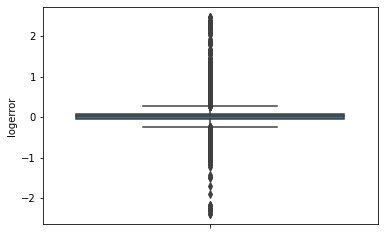

In [47]:
sns.boxplot(y=train.logerror, data=train)
#wtf is going on here
#it is telling me that there is a low hanging outlier (-4) that may skew my data
#it is also telling me that there is a heavy positive outlier (4)
#even though I have scaled my data I can go back and re-edit my outliers
#x=train.bathroomcnt, 

In [48]:
train.logerror.describe()

count    15598.000000
mean         0.032996
std          0.231020
min         -2.406257
25%         -0.053620
50%          0.037586
75%          0.079135
max          2.479045
Name: logerror, dtype: float64

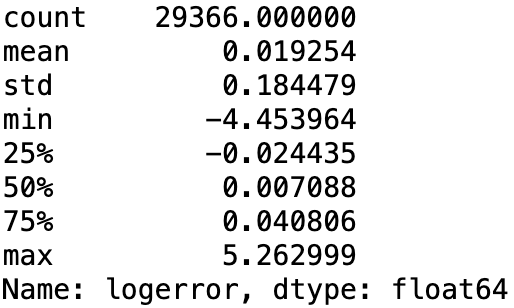

## Explore

The above reading tells me that I have not handled the upper outliers as much as I thought

In [49]:
#IT WORKS AS INTENDED FINALLY....only took like 30 minutes to fix
alpha = 0.05

### What is the relationship between bathroomcnt and logerror?

<AxesSubplot:xlabel='bathroomcnt', ylabel='logerror'>

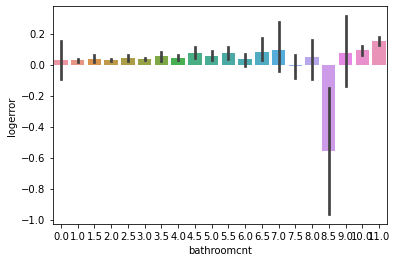

In [50]:
# wait now what? i can continue exploring to see where i find models
sns.barplot(x=train.bathroomcnt, y=train.logerror)
#what in good god happened at the 8.5 bath

### What is the relationship between error rate and bathroom count?

Null-Hypothesis: There is no relationship between bathrooms and log_error
<br>
Alternative-Hypothesis: There is a relationship between bathrooms and log_error

<AxesSubplot:xlabel='bathroomcnt', ylabel='logerror'>

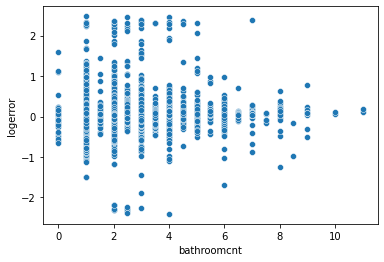

In [51]:
# only need like 3 or 4 exploring techniques to be able to deliver an MVP
sns.scatterplot(x=train.bathroomcnt, y=train.logerror)
#this here tells us that there is a little more inaccuracy around 1-5 bathrooms
#i can bin the data 
#use of a t-test
#to make proper use of statistics write out with numbers where the differences appear
#model is overweight one one side
#I CAN CLUSTER JUST THIS

In [52]:
test_results = stats.pearsonr(train.bathroomcnt , train.logerror )
test_results
print(test_results)
r, p = test_results
print(f'P is {p:.10f}')
if p < alpha:
    print('Therefore we reject the null hypothesis')

(0.03260304334438578, 4.648842567219295e-05)
P is 0.0000464884
Therefore we reject the null hypothesis


- takeaway: there is a larger range of error between 1 and 5 bathrooms
- the statistical test is telling us that although the relationship exists it is not a very strong signal

<img src="https://c.tenor.com/gQV5VzHLWQIAAAAd/among-us-sus.gif" width="12">

### What does the log error look like/where are the concentrations?

<AxesSubplot:xlabel='logerror', ylabel='Count'>

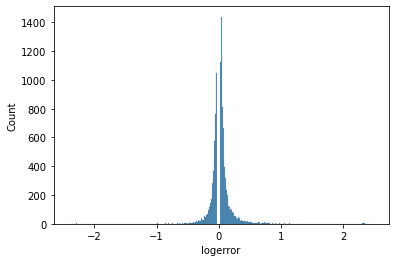

In [53]:
#histograms usually work off one variable
sns.histplot(x=train.logerror)

Takeaways: 
- there are more positive cases of error < 0.03 then there are negative
- which looks much different when zoomed out at a macro scale

In [54]:
train.columns

Index(['parcelid', 'propertylandusetypeid', 'id', 'bathroomcnt', 'bedroomcnt',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock', 'id', 'logerror', 'transactiondate',
       'propertylandusedesc'],
      dtype='object')

<b>If feature on here but not in list above drop below</b>
'propertylandusetypeid', 'bathroomcnt', 'bedroomcnt',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fullbathcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'rawcensustractandblock',
        'roomcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock'

## Important: this column drop has to be re-applied in order to have it in my validate and test sets

In [55]:
train.drop(columns=["parcelid","id","fips",
                    "propertycountylandusecode",
                    "regionidcity","regionidzip","transactiondate","propertylandusedesc","regionidcounty",
                   "assessmentyear"])
#I currently deem this unworthy of investigation, not with the short amount of time I have

,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror
40731,261.0,1.0,3.0,1.0,1014.0,1014.0,1.0,34582036.0,-118098837.0,6560.0,6.037911e+07,0.0,1953.0,95839.0,119798.0,23959.0,2205.67,6.037911e+13,-0.048415
1059,261.0,1.0,3.0,1.0,972.0,972.0,1.0,33910039.0,-118064750.0,6196.0,6.037552e+07,0.0,1950.0,59523.0,297619.0,238096.0,3863.36,6.037552e+13,0.171315
48642,261.0,2.0,4.0,2.0,1375.0,1375.0,2.0,33903910.0,-117894029.0,9672.0,6.059002e+07,7.0,1963.0,41818.0,68237.0,26419.0,1085.52,6.059002e+13,0.066977
42603,261.0,2.0,3.0,2.0,1504.0,1504.0,2.0,34681971.0,-118140788.0,7194.0,6.037901e+07,0.0,1980.0,137585.0,171979.0,34394.0,2825.66,6.037901e+13,0.037205
17181,261.0,2.0,3.0,2.0,1504.0,1504.0,2.0,34161832.0,-118349956.0,6667.0,6.037311e+07,0.0,1941.0,173744.0,474143.0,300399.0,5216.03,6.037311e+13,0.037416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39497,261.0,1.0,2.0,1.0,1696.0,1696.0,1.0,34148774.0,-117861500.0,68460.0,6.037401e+07,0.0,1947.0,223355.0,1116775.0,893420.0,12526.66,6.037401e+13,0.081726
22243,261.0,1.0,4.0,1.0,1011.0,1011.0,1.0,33957673.0,-118257969.0,5157.0,6.037240e+07,0.0,1937.0,123163.0,235091.0,111928.0,3049.57,6.037240e+13,-0.084951
5965,261.0,3.0,3.0,3.0,2370.0,2370.0,3.0,34557122.0,-118055754.0,7004.0,6.037911e+07,0.0,1991.0,123079.0,153848.0,30769.0,3792.13,6.037911e+13,0.678761
51844,261.0,3.0,4.0,3.0,2302.0,2302.0,3.0,34227488.0,-118522387.0,6075.0,6.037115e+07,0.0,1979.0,237173.0,514914.0,277741.0,6342.20,6.037115e+13,-0.079843


Dropping off columns that are discrete values. IE not useful for the machine learning model

### What does the distribution of bedrooms look like

In [56]:
train.bedroomcnt.value_counts()

3.0     6679
4.0     4298
2.0     2796
5.0     1244
6.0      246
1.0      225
0.0       51
7.0       40
8.0       14
9.0        4
10.0       1
Name: bedroomcnt, dtype: int64

Most of the entries have 2, 3, and 4 bedrooms

<hr>

I now need stats test for continuous on continous data not sure what calculations to use so will go there shortly

This would mean numerical stats tests

These include:
- ANOVA
- t-test
- Mann Whitney U test
- Pearson R
- paired T-test

In [57]:
stuff=["scatterplot","barplot","stripplot","swarmplot","boxplot","violinplot","boxenplot","pointplot","boxplot","countplot"]

# for stuf in stuff:
#     return sns.stuf(y=train.logerror, x=train.taxvaluedollarcnt)

### Where do the errors lie in relation to taxvaluedollarcnt

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='logerror'>

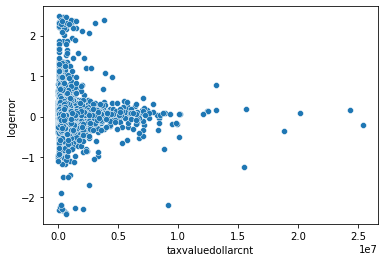

In [58]:
sns.scatterplot(y=train.logerror,x=train.taxvaluedollarcnt)
#hey wait a minute it seems to be all in a small area here

Takeaways:
- that the majority of the errors seem to be around the lower price point

## Modeling

In [59]:
#not sure if using this yet
train_scaled.head(3)

,parcelid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror,transactiondate,propertylandusedesc
40731,11201787,0.0,1076702,0.090909,0.3,0.0,0.043266,0.043266,6037.0,0.0,...,0.012987,0.004681,0.0,0.001028,0.007367,0.000019,35109.0,-0.048415,2017-05-11,Single Family Residential
1059,12742740,0.0,1171903,0.090909,0.3,0.0,0.040790,0.040790,6037.0,0.0,...,0.008059,0.011687,0.0,0.010616,0.013064,0.000011,821.0,0.171315,2017-01-05,Single Family Residential
48642,14139824,0.0,1547881,0.181818,0.4,0.1,0.064545,0.064545,6059.0,0.1,...,0.005657,0.002649,0.0,0.001138,0.003517,0.000518,27473.0,0.066977,2017-04-18,Single Family Residential


In [75]:
#label what we want clustered
X = train[["logerror"]]
#get the thing
kmeans = KMeans(n_clusters=5)
#fit the thing
kmeans.fit(X)
#run the thing
print(kmeans.predict(X))
#make new column named cluster that holds their clustere value group 0-4
train['cluster'] = kmeans.predict(X)


[0 2 2 ... 1 0 2]


Checking if the code worked

In [62]:
train

,parcelid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror,transactiondate,propertylandusedesc,cluster
40731,11201787,261.0,1076702,1.0,3.0,1.0,1014.0,1014.0,6037.0,1.0,...,119798.0,2016.0,23959.0,2205.67,6.037911e+13,35109.0,-0.048415,2017-05-11,Single Family Residential,0
1059,12742740,261.0,1171903,1.0,3.0,1.0,972.0,972.0,6037.0,1.0,...,297619.0,2016.0,238096.0,3863.36,6.037552e+13,821.0,0.171315,2017-01-05,Single Family Residential,2
48642,14139824,261.0,1547881,2.0,4.0,2.0,1375.0,1375.0,6059.0,2.0,...,68237.0,2016.0,26419.0,1085.52,6.059002e+13,27473.0,0.066977,2017-04-18,Single Family Residential,2
42603,11284938,261.0,1733607,2.0,3.0,2.0,1504.0,1504.0,6037.0,2.0,...,171979.0,2016.0,34394.0,2825.66,6.037901e+13,70368.0,0.037205,2017-08-25,Single Family Residential,2
17181,10959322,261.0,792630,2.0,3.0,2.0,1504.0,1504.0,6037.0,2.0,...,474143.0,2016.0,300399.0,5216.03,6.037311e+13,68119.0,0.037416,2017-08-18,Single Family Residential,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39497,13031951,261.0,1770092,1.0,2.0,1.0,1696.0,1696.0,6037.0,1.0,...,1116775.0,2016.0,893420.0,12526.66,6.037401e+13,6161.0,0.081726,2017-01-27,Single Family Residential,2
22243,12212883,261.0,1483089,1.0,4.0,1.0,1011.0,1011.0,6037.0,1.0,...,235091.0,2016.0,111928.0,3049.57,6.037240e+13,42175.0,-0.084951,2017-06-01,Single Family Residential,0
5965,11236523,261.0,256768,3.0,3.0,3.0,2370.0,2370.0,6037.0,3.0,...,153848.0,2016.0,30769.0,3792.13,6.037911e+13,16750.0,0.678761,2017-03-14,Single Family Residential,3
51844,11102412,261.0,1852409,3.0,4.0,3.0,2302.0,2302.0,6037.0,3.0,...,514914.0,2016.0,277741.0,6342.20,6.037115e+13,36423.0,-0.079843,2017-05-16,Single Family Residential,0


### Where is the best amount of clusters

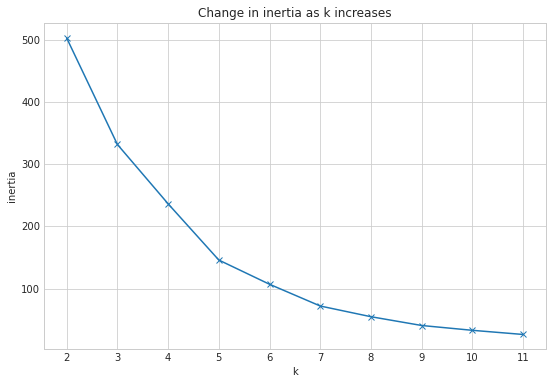

In [63]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

Takeaway:
- the magic number of clusters is anywhere between 5 and 7

In [64]:
kmeans.cluster_centers_
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,logerror
0,-0.091332
1,1.930093
2,0.084415
3,0.497622
4,-0.933584


In [66]:
train.logerror.value_counts()

-0.033416    2
 0.031597    2
 0.036168    2
 0.051113    2
-0.044769    2
            ..
 0.190799    1
 0.066070    1
 0.076103    1
 0.190151    1
 0.041462    1
Name: logerror, Length: 15592, dtype: int64

### What do the clusters look like when there are 5 of them

KeyError: 'bathroomcnt'

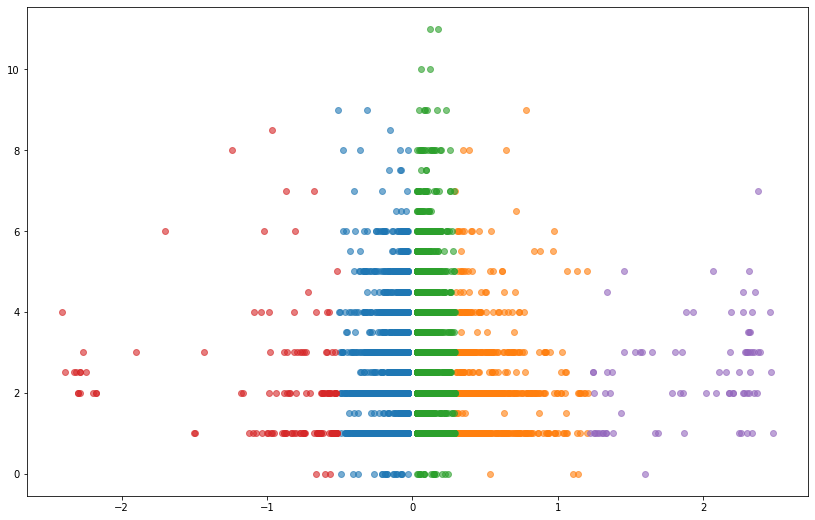

In [77]:
plt.figure(figsize=(14, 9))

for cluster, subset in train.groupby('cluster'):
    plt.scatter(subset.logerror, subset.bathroomcnt,label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='log_error', x='bathroomcnt', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('bathroomcnt')
plt.ylabel('log_error')
plt.title('Visualizing Cluster Centers')

### Where are the groups the clusters live in

<AxesSubplot:xlabel='cluster', ylabel='logerror'>

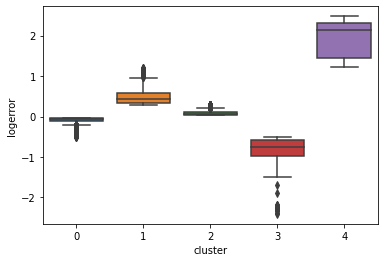

In [78]:
#don't let this in the x train of my models
sns.boxplot(x="cluster", y="logerror", data=train)
#2 clusters are pretty accurate 

#1 cluster over shoots a little bit
#2 clusters have my clues
# one positive and one negative

Takeaway:
- 2 clusters are pretty accurate 
- 1 cluster over shoots a little bit
- 2 clusters have my clues
  - one positive and one negative

Numerical amount of groups

In [80]:
train.cluster.value_counts()

2    8306
0    6360
1     722
3     130
4      80
Name: cluster, dtype: int64

Most of the misses are percise

most of the predictions while off were fairly accurate


the outliers are way smaller then expected


may have to zoom in on or find another interpretation

### What does the distribution look like with 6 clustering groups

[0 2 2 ... 3 0 2]


KeyError: 'bathroomcnt'

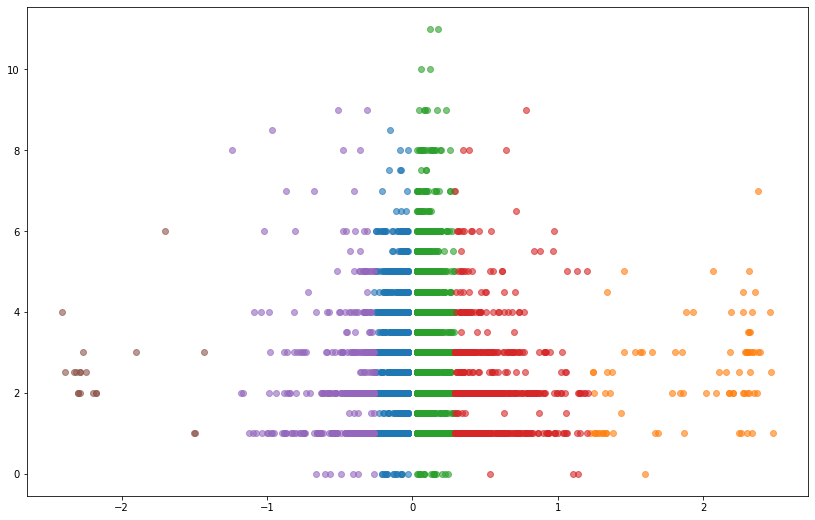

In [81]:
#label what we want clustered
# X = train[["logerror"]]
#get the thing
kmeans = KMeans(n_clusters=6)
#fit the thing
kmeans.fit(X)
#run the thing
print(kmeans.predict(X))
#make new column named cluster that holds their clustere value group 0-4
train['cluster'] = kmeans.predict(X)
plt.figure(figsize=(14, 9))

for cluster, subset in train.groupby('cluster'):
    plt.scatter(subset.logerror, subset.bathroomcnt,label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='log_error', x='bathroomcnt', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('bathroomcnt')
plt.ylabel('log_error')
plt.title('Visualizing Cluster Centers')

The results are very similar to the one with 5 cluster points but this one shows us that there is a subsection at 4 worth investigating

### Where are the groups the clusters live in

<AxesSubplot:xlabel='cluster', ylabel='logerror'>

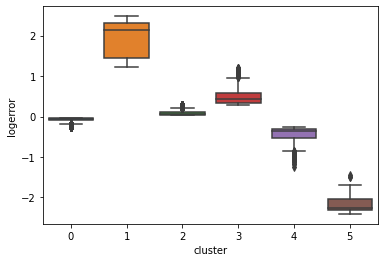

In [82]:
sns.boxplot(x="cluster", y="logerror", data=train)

The smaller outliers are getting squeezed

In [85]:
train.cluster.value_counts()

2    8302
0    6039
3     726
4     432
1      80
5      19
Name: cluster, dtype: int64